In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

%matplotlib inline
rcParams['figure.figsize'] = 10,8
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (12,8)})

In [2]:
train = pd.read_csv('train.csv', )
test = pd.read_csv('test.csv')
df = pd.concat([train, test], axis=0, sort=True)

In [3]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [4]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

        
display_all(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1046.0,NaN,NaN,NaN,29.881138,14.413493,0.17,21.0,28.0,39.0,80.0
Cabin,295,186,C23 C25 C27,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,1307,3,S,914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,1308.0,NaN,NaN,NaN,33.295479,51.758668,0.0,7.8958,14.4542,31.275,512.3292
Name,1309,1307,"Kelly, Mr. James",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
PassengerId,1309.0,NaN,NaN,NaN,655.0,378.020061,1.0,328.0,655.0,982.0,1309.0
Pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
Sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SibSp,1309.0,NaN,NaN,NaN,0.498854,1.041658,0.0,0.0,0.0,1.0,8.0


In [5]:
df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [6]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=True)

In [7]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [8]:
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Ms            2
Major         2
Dona          1
Capt          1
Sir           1
Lady          1
Countess      1
Don           1
Mme           1
Jonkheer      1
Name: Title, dtype: int64

In [9]:
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr',
           'Don': 'Mr', 'Mme': 'Mrs', 'Jonkheer': 'Mr', 'Lady': 'Mrs',
           'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
df.replace({'Title': mapping}, inplace=True)

In [10]:
df['Title'].value_counts()

Mr        767
Miss      264
Mrs       201
Master     61
Dr          8
Rev         8
Name: Title, dtype: int64

In [11]:
# impute missing Age values using median of Title groups
title_ages = dict(df.groupby('Title')['Age'].median())

# create a column of the average ages
df['age_med'] = df['Title'].apply(lambda x: title_ages[x])

# replace all missing ages with the value in this column
df['Age'].fillna(df['age_med'], inplace=True, )
del df['age_med']

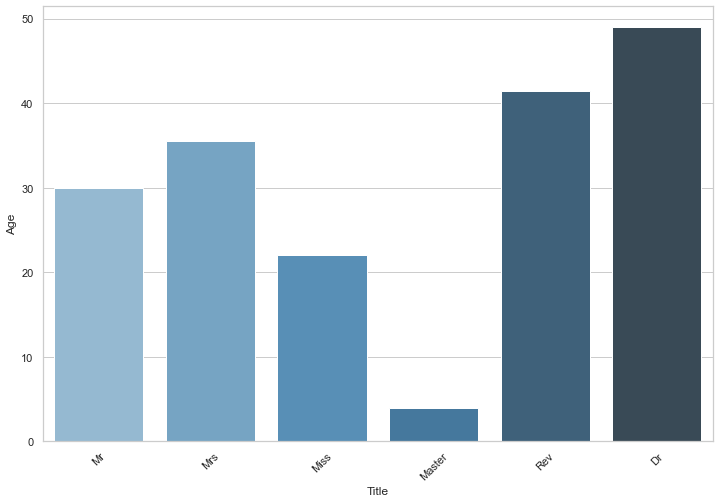

In [12]:
sns.barplot(x='Title', y='Age', data=df, estimator=np.median, ci=None, palette='Blues_d')
plt.xticks(rotation=45)
plt.show()

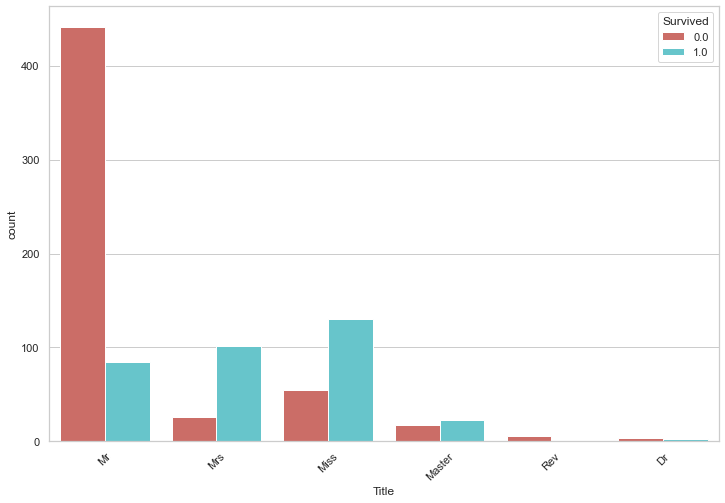

In [13]:
sns.countplot(x='Title', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


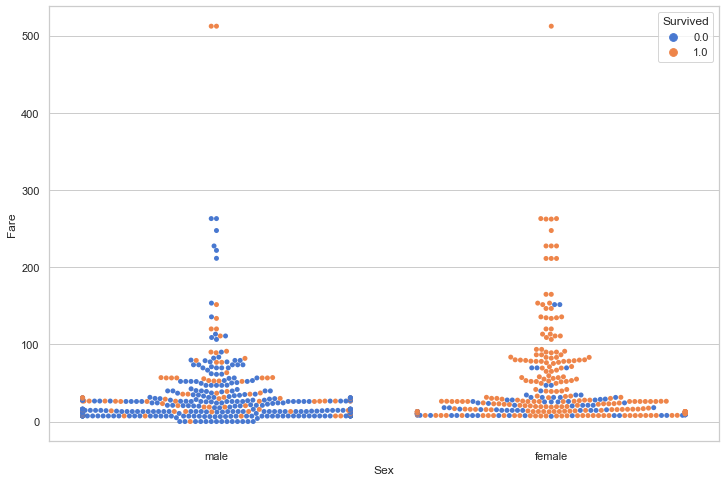

In [14]:
sns.swarmplot(x='Sex', y='Fare', hue='Survived', data=df)
plt.show()

In [15]:
# impute missing Fare values using median of Pclass groups
class_fares = dict(df.groupby('Pclass')['Fare'].median())

# create a column of the average fares
df['fare_med'] = df['Pclass'].apply(lambda x: class_fares[x])

# replace all missing fares with the value in this column
df['Fare'].fillna(df['fare_med'], inplace=True, )
del df['fare_med']

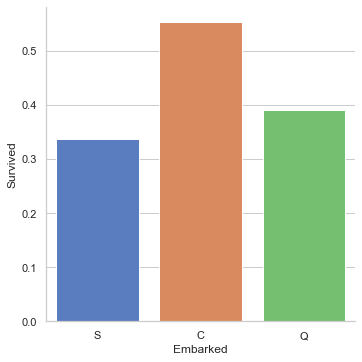

In [16]:
sns.catplot(x='Embarked', y='Survived', data=df,
            kind='bar', palette='muted', ci=None)
plt.show()

In [17]:
df['Embarked'].fillna(method='backfill', inplace=True)

In [18]:
df['Family_Size'] = df['Parch'] + df['SibSp']

In [19]:
display_all(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1309.0,NaN,NaN,NaN,29.562391,13.16536,0.17,22.0,30.0,35.5,80.0
Cabin,295,186,C23 C25 C27,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,1309,3,S,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,1309.0,NaN,NaN,NaN,33.276193,51.743584,0.0,7.8958,14.4542,31.275,512.3292
Name,1309,1307,"Kelly, Mr. James",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
PassengerId,1309.0,NaN,NaN,NaN,655.0,378.020061,1.0,328.0,655.0,982.0,1309.0
Pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
Sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SibSp,1309.0,NaN,NaN,NaN,0.498854,1.041658,0.0,0.0,0.0,1.0,8.0


In [20]:
train = df[pd.notnull(df['Survived'])]
test = df[pd.isnull(df['Survived'])]

In [21]:
train.to_csv('train_clean.csv', index=False)
test.to_csv('test_clean.csv', index=False)

# Partie 2

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

%matplotlib inline
rcParams['figure.figsize'] = 10,8
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

In [23]:
train = pd.read_csv('train_clean.csv', )
test = pd.read_csv('test_clean.csv')
df = pd.concat([train, test], axis=0, sort=True)

In [24]:
df.head()

,Age,Cabin,Embarked,Family_Size,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,0,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [25]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

        
display_all(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1309.0,NaN,NaN,NaN,29.562391,13.16536,0.17,22.0,30.0,35.5,80.0
Cabin,295,186,C23 C25 C27,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,1309,3,S,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family_Size,1309.0,NaN,NaN,NaN,0.883881,1.583639,0.0,0.0,0.0,1.0,10.0
Fare,1309.0,NaN,NaN,NaN,33.276193,51.743584,0.0,7.8958,14.4542,31.275,512.3292
Name,1309,1307,"Kelly, Mr. James",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
PassengerId,1309.0,NaN,NaN,NaN,655.0,378.020061,1.0,328.0,655.0,982.0,1309.0
Pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
Sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

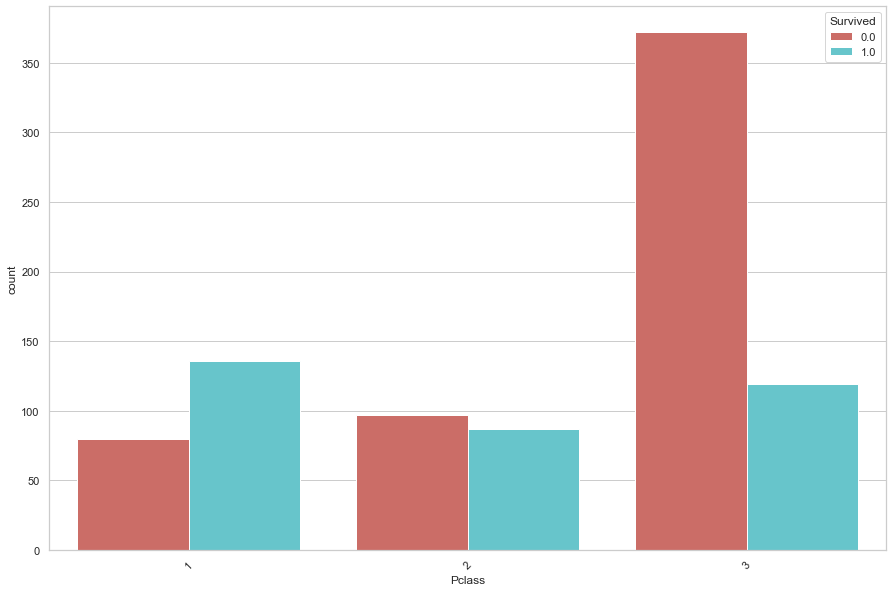

In [27]:
sns.countplot(x='Pclass', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

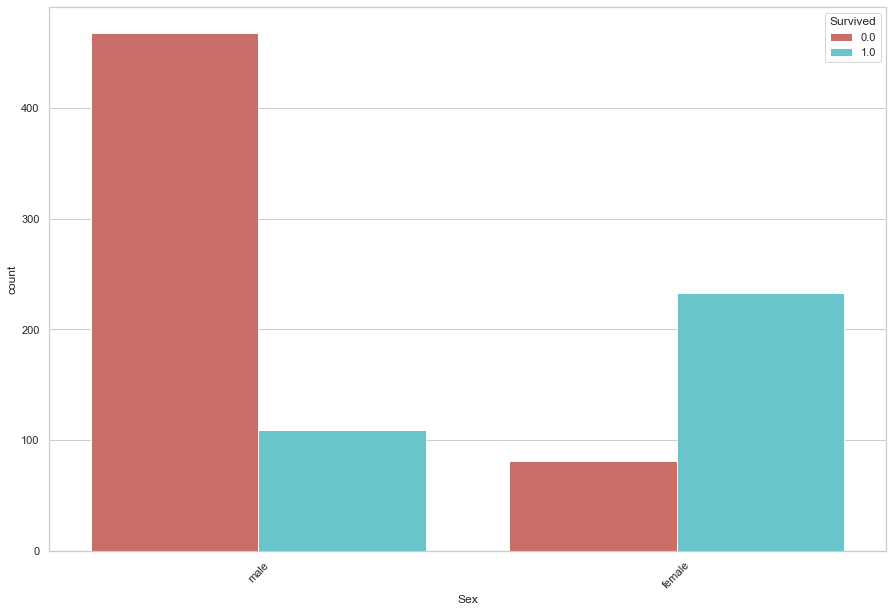

In [28]:
sns.countplot(x='Sex', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

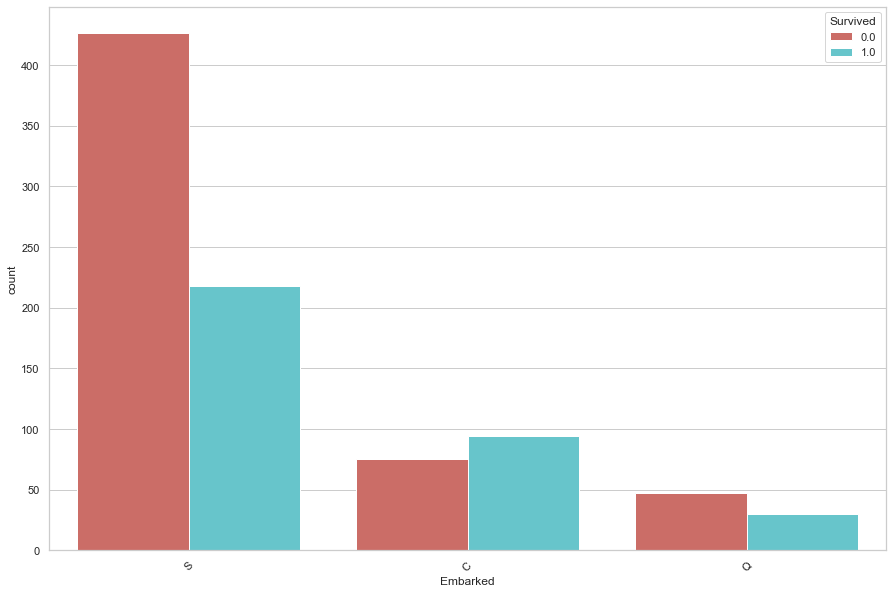

In [29]:
sns.countplot(x='Embarked', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

In [30]:
# convert to category dtype
df['Sex'] = df['Sex'].astype('category')
# convert to category codes
df['Sex'] = df['Sex'].cat.codes

In [31]:
# subset all categorical variables which need to be encoded
categorical = ['Embarked', 'Title']

for var in categorical:
    df = pd.concat([df, 
                    pd.get_dummies(df[var], prefix=var)], axis=1)
    del df[var]

In [32]:
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [33]:
df.head()

,Age,Family_Size,Fare,Parch,Pclass,Sex,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,22.0,1,7.2500,0,3,1,1,0.0,0,0,1,0,0,0,1,0,0
1,38.0,1,71.2833,0,1,0,1,1.0,1,0,0,0,0,0,0,1,0
2,26.0,0,7.9250,0,3,0,0,1.0,0,0,1,0,0,1,0,0,0
3,35.0,1,53.1000,0,1,0,1,1.0,0,0,1,0,0,0,0,1,0
4,35.0,0,8.0500,0,3,1,0,0.0,0,0,1,0,0,0,1,0,0


In [34]:
train = df[pd.notnull(df['Survived'])]
X_test = df[pd.isnull(df['Survived'])].drop(['Survived'], axis=1)

In [35]:
X_train, X_val, y_train, y_val = train_test_split(
    train.drop(['Survived'], axis=1),
    train['Survived'],
    test_size=0.2, random_state=42)

In [36]:
for i in [X_train, X_val, X_test]:
    print(i.shape)

(712, 16)
(179, 16)
(418, 16)


In [37]:
rf = RandomForestClassifier(n_estimators = 2000, max_depth = 5, min_samples_leaf = 1, bootstrap = True, max_features = 5, random_state=42)

In [38]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=5, n_estimators=2000,
                       random_state=42)

In [39]:
accuracy_score(y_val, rf.predict(X_val))

0.8212290502793296

In [40]:
X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])

In [41]:
X_train.shape

(891, 16)

In [42]:
rf = RandomForestClassifier(n_estimators=10, random_state=42)
cross_val_score(rf, X_train, y_train, cv=5)

array([0.77653631, 0.85393258, 0.79213483, 0.83146067, 0.78651685])

In [43]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.8081162513338773

In [44]:
# create the grid
n_estimators = [10, 100, 1000, 2000]
max_depth = [None, 5, 10, 20]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

In [45]:
# create the default model
rf = RandomForestClassifier(random_state=42)

# search the grid
grid = GridSearchCV(estimator=rf, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [46]:
grid_result.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=2000, random_state=42)

In [47]:
grid_result.best_params_

{'max_depth': 5, 'n_estimators': 2000}

In [48]:
grid_result.best_score_

0.8338945005611672

In [49]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.833895 using {'max_depth': 5, 'n_estimators': 2000}
0.786756 (0.023056) with: {'max_depth': None, 'n_estimators': 10}
0.801347 (0.018027) with: {'max_depth': None, 'n_estimators': 100}
0.806958 (0.015141) with: {'max_depth': None, 'n_estimators': 1000}
0.806958 (0.013837) with: {'max_depth': None, 'n_estimators': 2000}
0.827160 (0.023381) with: {'max_depth': 5, 'n_estimators': 10}
0.832772 (0.016571) with: {'max_depth': 5, 'n_estimators': 100}
0.832772 (0.016571) with: {'max_depth': 5, 'n_estimators': 1000}
0.833895 (0.017887) with: {'max_depth': 5, 'n_estimators': 2000}
0.821549 (0.016722) with: {'max_depth': 10, 'n_estimators': 10}
0.818182 (0.014547) with: {'max_depth': 10, 'n_estimators': 100}
0.818182 (0.021472) with: {'max_depth': 10, 'n_estimators': 1000}
0.814815 (0.021472) with: {'max_depth': 10, 'n_estimators': 2000}
0.786756 (0.023381) with: {'max_depth': 20, 'n_estimators': 10}
0.801347 (0.019244) with: {'max_depth': 20, 'n_estimators': 100}
0.806958 (0.015141) with

In [50]:
leaf_samples = [1, 2, 3, 4, 5, 6]
param_grid = dict(min_samples_leaf=leaf_samples)

# create the model with new max_depth and n_estimators
rf = grid_result.best_estimator_

# search the grid
grid = GridSearchCV(estimator=rf, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [51]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.833895 using {'min_samples_leaf': 1}
0.833895 (0.017887) with: {'min_samples_leaf': 1}
0.832772 (0.019309) with: {'min_samples_leaf': 2}
0.832772 (0.019309) with: {'min_samples_leaf': 3}
0.831650 (0.018027) with: {'min_samples_leaf': 4}
0.831650 (0.018027) with: {'min_samples_leaf': 5}
0.832772 (0.019309) with: {'min_samples_leaf': 6}


In [52]:
# create the grid
max_features = [5, 8, 10, 12, None]
bootstrap = [True, False]
param_grid = dict(max_features=max_features, bootstrap=bootstrap)

# create the model with new leaf size
rf = grid_result.best_estimator_

# search the grid
grid = GridSearchCV(estimator=rf, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [53]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.832772 using {'bootstrap': True, 'max_features': 5}
0.832772 (0.019309) with: {'bootstrap': True, 'max_features': 5}
0.830527 (0.013837) with: {'bootstrap': True, 'max_features': 8}
0.829405 (0.016571) with: {'bootstrap': True, 'max_features': 10}
0.829405 (0.019309) with: {'bootstrap': True, 'max_features': 12}
0.829405 (0.019504) with: {'bootstrap': True, 'max_features': None}
0.831650 (0.020756) with: {'bootstrap': False, 'max_features': 5}
0.829405 (0.017887) with: {'bootstrap': False, 'max_features': 8}
0.824916 (0.020756) with: {'bootstrap': False, 'max_features': 10}
0.823793 (0.019504) with: {'bootstrap': False, 'max_features': 12}
0.818182 (0.023489) with: {'bootstrap': False, 'max_features': None}


In [54]:
rf = grid_result.best_estimator_

In [55]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.8327851358985626

In [56]:
test['Survived'] = rf.predict(X_test)

In [57]:
solution = test[['PassengerId', 'Survived']]
solution['Survived'] = solution['Survived'].apply(int)

<ipython-input-57-045cc2177bcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solution['Survived'] = solution['Survived'].apply(int)


In [58]:
solution.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [59]:
solution.to_csv("Random_Forest_Solution.csv", index=False)

# PARTIE 3

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 10,8
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed

In [61]:
train = pd.read_csv('train_clean.csv', )
test = pd.read_csv('test_clean.csv')
df = pd.concat([train, test], axis=0, sort=True)

In [62]:
df.head()

,Age,Cabin,Embarked,Family_Size,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,0,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [63]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

        
display_all(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1309.0,NaN,NaN,NaN,29.562391,13.16536,0.17,22.0,30.0,35.5,80.0
Cabin,295,186,C23 C25 C27,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,1309,3,S,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family_Size,1309.0,NaN,NaN,NaN,0.883881,1.583639,0.0,0.0,0.0,1.0,10.0
Fare,1309.0,NaN,NaN,NaN,33.276193,51.743584,0.0,7.8958,14.4542,31.275,512.3292
Name,1309,1307,"Kelly, Mr. James",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
PassengerId,1309.0,NaN,NaN,NaN,655.0,378.020061,1.0,328.0,655.0,982.0,1309.0
Pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
Sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN


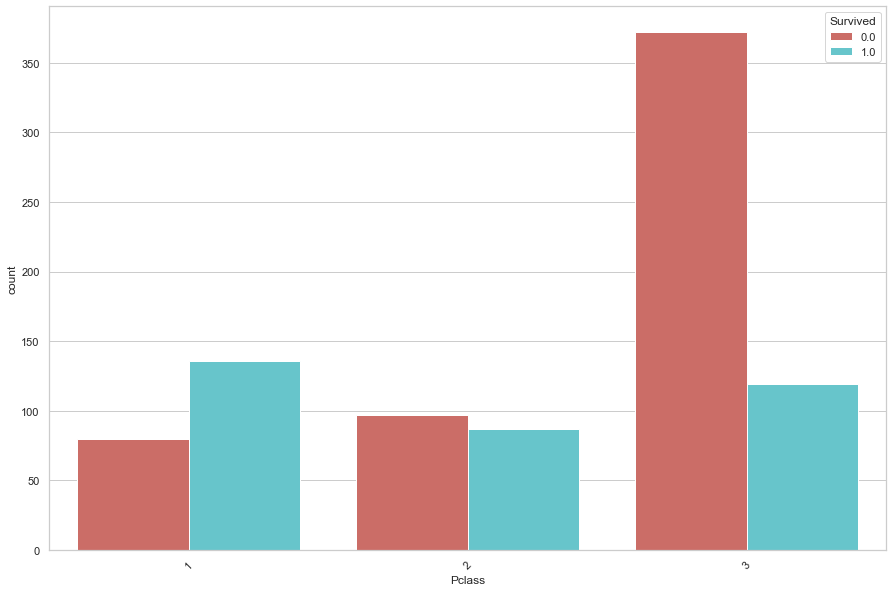

In [64]:
sns.countplot(x='Pclass', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

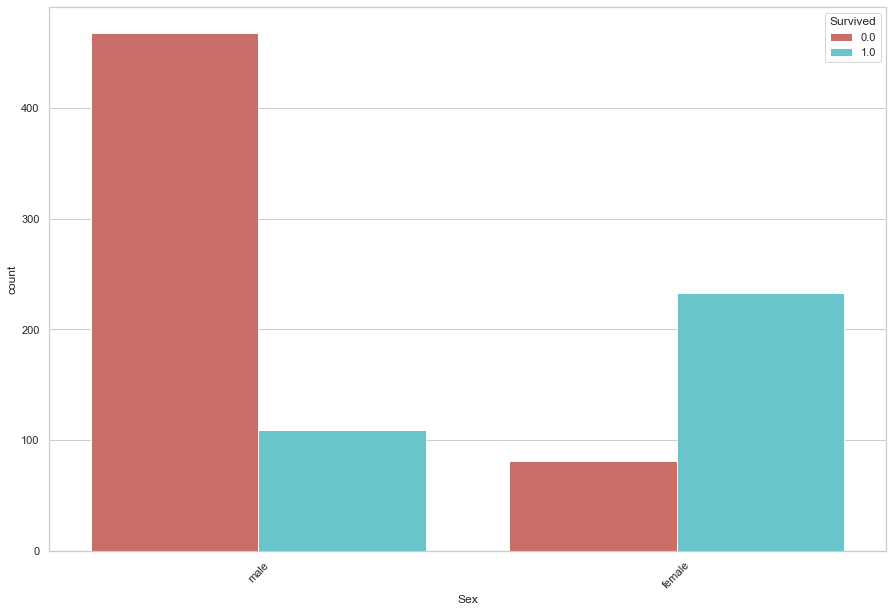

In [65]:
sns.countplot(x='Sex', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

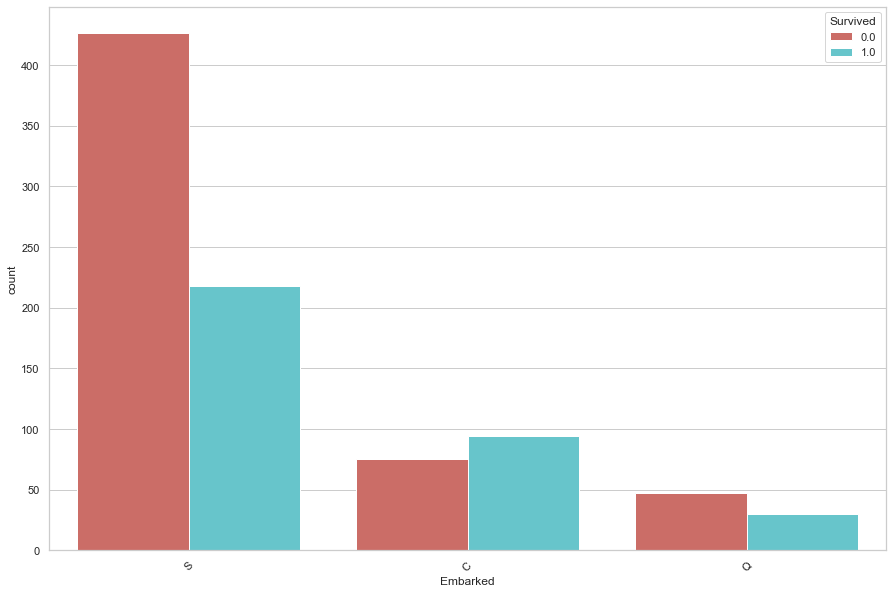

In [66]:
sns.countplot(x='Embarked', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

In [67]:
# convert to cateogry dtype
df['Sex'] = df['Sex'].astype('category')
# convert to category codes
df['Sex'] = df['Sex'].cat.codes

In [68]:
# subset all categorical variables which need to be encoded
categorical = ['Embarked', 'Title']

for var in categorical:
    df = pd.concat([df, 
                    pd.get_dummies(df[var], prefix=var)], axis=1)
    del df[var]

In [69]:
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [70]:
df.head()

,Age,Family_Size,Fare,Parch,Pclass,Sex,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,22.0,1,7.2500,0,3,1,1,0.0,0,0,1,0,0,0,1,0,0
1,38.0,1,71.2833,0,1,0,1,1.0,1,0,0,0,0,0,0,1,0
2,26.0,0,7.9250,0,3,0,0,1.0,0,0,1,0,0,1,0,0,0
3,35.0,1,53.1000,0,1,0,1,1.0,0,0,1,0,0,0,0,1,0
4,35.0,0,8.0500,0,3,1,0,0.0,0,0,1,0,0,0,1,0,0


In [71]:
continuous = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Family_Size']

scaler = StandardScaler()

for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))

In [72]:
display_all(df.describe(include='all').T)

,count,mean,std,min,25%,50%,75%,max
Age,1309.0,1.692899e-16,1.000382,-2.233408,-0.574635,0.033252,0.451175,3.832549
Family_Size,1309.0,2.593630e-16,1.000382,-0.558346,-0.558346,-0.558346,0.073352,5.758637
Fare,1309.0,-6.473474e-17,1.000382,-0.643344,-0.490691,-0.363894,-0.038690,9.261749
Parch,1309.0,-8.549311e-17,1.000382,-0.445000,-0.445000,-0.445000,-0.445000,9.956864
Pclass,1309.0,-1.399441e-16,1.000382,-1.546098,-0.352091,0.841916,0.841916,0.841916
Sex,1309.0,6.440031e-01,0.478997,0.000000,0.000000,1.000000,1.000000,1.000000
SibSp,1309.0,-6.632925e-16,1.000382,-0.479087,-0.479087,-0.479087,0.481288,7.203909
Survived,891.0,3.838384e-01,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Embarked_C,1309.0,2.070283e-01,0.405331,0.000000,0.000000,0.000000,0.000000,1.000000
Embarked_Q,1309.0,9.396486e-02,0.291891,0.000000,0.000000,0.000000,0.000000,1.000000


In [73]:
X_train = df[pd.notnull(df['Survived'])].drop(['Survived'], axis=1)
y_train = df[pd.notnull(df['Survived'])]['Survived']
X_test = df[pd.isnull(df['Survived'])].drop(['Survived'], axis=1)

In [96]:
n_features = X_train.shape[1]

In [106]:
def create_model(lyrs=[8], act='linear', opt='Nadam', dr=0.0):
    
    # set random seed for reproducibility
    seed(42)
    tensorflow.random.set_seed(42)
    
    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=n_features, activation=act))
    
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    # add dropout, default is none
    model.add(Dropout(dr))
    
    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [107]:
import tensorflow
model = create_model()
print(model.summary())

Model: "sequential_172"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_364 (Dense)           (None, 8)                 136       
                                                                 
 dropout_172 (Dropout)       (None, 8)                 0         
                                                                 
 dense_365 (Dense)           (None, 1)                 9         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________
None


In [108]:
training = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=0)
val_accuracy = np.mean(training.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 80.12%


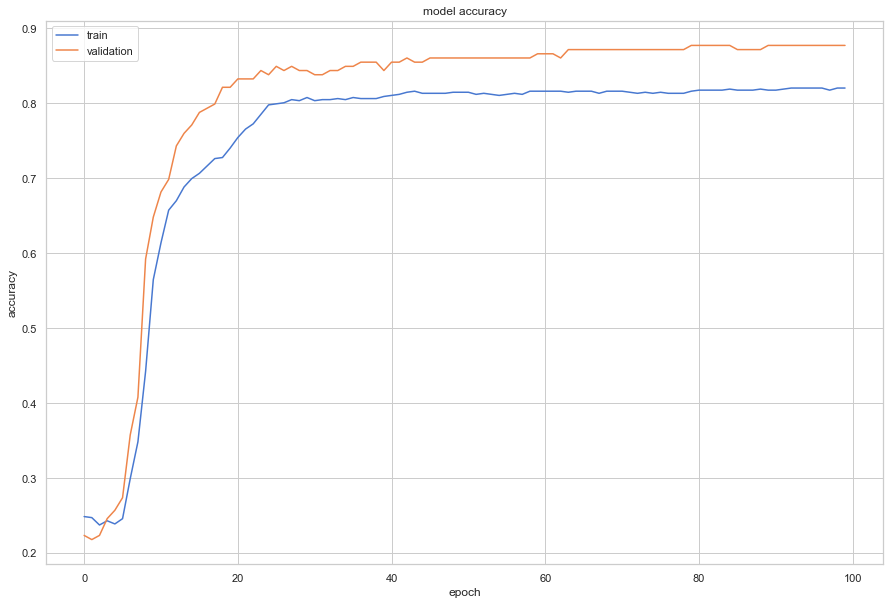

In [109]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [110]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [16, 32, 64]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2)  # include n_jobs=-1 if you are using CPU

grid_result = grid.fit(X_train, y_train)

<ipython-input-110-3f1475744285>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ...........................batch_size=16, epochs=50; total time=   4.2s
[CV] END ...........................batch_size=16, epochs=50; total time=   4.5s
[CV] END ...........................batch_size=16, epochs=50; total time=   4.7s
[CV] END ..........................batch_size=16, epochs=100; total time=   6.6s
[CV] END ..........................batch_size=16, epochs=100; total time=   7.9s
[CV] END ..........................batch_size=16, epochs=100; total time=   4.7s
[CV] END ...........................batch_size=32, epochs=50; total time=   1.7s
[CV] END ...........................batch_size=32, epochs=50; total time=   2.3s
[CV] END ...........................batch_size=32, epochs=50; total time=   1.9s
[CV] END ..........................batch_size=32, epochs=100; total time=   3.4s
[CV] END ..........................batch_size=32, epochs=100; total time=   2.7s
[CV] END ..........................batch_size=32,

In [105]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.639731 using {'batch_size': 16, 'epochs': 100}
0.621773 (0.037527) with: {'batch_size': 16, 'epochs': 50}
0.639731 (0.052378) with: {'batch_size': 16, 'epochs': 100}
0.612795 (0.033782) with: {'batch_size': 32, 'epochs': 50}
0.625140 (0.040529) with: {'batch_size': 32, 'epochs': 100}
0.611672 (0.032567) with: {'batch_size': 64, 'epochs': 50}
0.616162 (0.033445) with: {'batch_size': 64, 'epochs': 100}


In [80]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=64, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(opt=optimizer)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


<ipython-input-80-c686cb2b050a>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=64, verbose=0)


[CV] END ............................................opt=SGD; total time=   7.7s
[CV] END ............................................opt=SGD; total time=   7.5s
[CV] END ............................................opt=SGD; total time=   8.6s
[CV] END ............................................opt=SGD; total time=   8.3s
[CV] END ............................................opt=SGD; total time=   7.6s
[CV] END ........................................opt=RMSprop; total time=   4.6s
[CV] END ........................................opt=RMSprop; total time=   8.0s
[CV] END ........................................opt=RMSprop; total time=   7.4s
[CV] END ........................................opt=RMSprop; total time=   6.3s
[CV] END ........................................opt=RMSprop; total time=   7.1s
[CV] END ........................................opt=Adagrad; total time=   6.8s
[CV] END ........................................opt=Adagrad; total time=   7.3s
[CV] END ...................

In [81]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.829396 using {'opt': 'Nadam'}
0.801350 (0.028974) with: {'opt': 'SGD'}
0.827161 (0.033965) with: {'opt': 'RMSprop'}
0.270529 (0.027993) with: {'opt': 'Adagrad'}
0.250317 (0.025582) with: {'opt': 'Adadelta'}
0.827155 (0.033996) with: {'opt': 'Adam'}
0.829396 (0.034235) with: {'opt': 'Nadam'}


In [82]:
seed(42)
tensorflow.random.set_seed(42)

# create model
model = KerasClassifier(build_fn=create_model, 
                        epochs=100, batch_size=64, verbose=0)

# define the grid search parameters
layers = [[8],[10],[10,5],[12,6],[12,8,4]]
param_grid = dict(lyrs=layers)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


<ipython-input-82-a72fee3c1f48>:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model,


[CV] END ...........................................lyrs=[8]; total time=   7.5s
[CV] END ...........................................lyrs=[8]; total time=   4.7s
[CV] END ...........................................lyrs=[8]; total time=   4.8s
[CV] END ...........................................lyrs=[8]; total time=   4.6s
[CV] END ...........................................lyrs=[8]; total time=   4.8s
[CV] END ..........................................lyrs=[10]; total time=   4.8s
[CV] END ..........................................lyrs=[10]; total time=   4.7s
[CV] END ..........................................lyrs=[10]; total time=   5.2s
[CV] END ..........................................lyrs=[10]; total time=   4.6s
[CV] END ..........................................lyrs=[10]; total time=   4.7s
[CV] END .......................................lyrs=[10, 5]; total time=   5.0s
[CV] END .......................................lyrs=[10, 5]; total time=   5.0s
[CV] END ...................

In [83]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.829396 using {'lyrs': [8]}
0.829396 (0.034235) with: {'lyrs': [8]}
0.823803 (0.034139) with: {'lyrs': [10]}
0.824920 (0.033945) with: {'lyrs': [10, 5]}
0.823809 (0.034654) with: {'lyrs': [12, 6]}
0.822685 (0.034478) with: {'lyrs': [12, 8, 4]}


In [89]:
# create model
model = KerasClassifier(build_fn=create_model, 
                        epochs=100, batch_size=64, verbose=0)

drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]
param_grid = dict(dr=drops)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train, verbose = 0)

<ipython-input-89-b46d31f2997a>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model,


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .............................................dr=0.0; total time=   6.7s
[CV] END .............................................dr=0.0; total time=   6.5s
[CV] END .............................................dr=0.0; total time=   5.0s
[CV] END .............................................dr=0.0; total time=   5.8s
[CV] END .............................................dr=0.0; total time=   7.9s
[CV] END ............................................dr=0.01; total time=   8.3s
[CV] END ............................................dr=0.01; total time=   6.9s
[CV] END ............................................dr=0.01; total time=   7.8s
[CV] END ............................................dr=0.01; total time=   8.4s
[CV] END ............................................dr=0.01; total time=   8.8s
[CV] END ............................................dr=0.05; total time=   8.7s
[CV] END ........................................

In [90]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.829396 using {'dr': 0.0}
0.829396 (0.034235) with: {'dr': 0.0}
0.828272 (0.034241) with: {'dr': 0.01}
0.827155 (0.032086) with: {'dr': 0.05}
0.827155 (0.031086) with: {'dr': 0.1}
0.826031 (0.032013) with: {'dr': 0.2}
0.817061 (0.028983) with: {'dr': 0.5}


In [91]:
# create final model
model = create_model(lyrs=[8], dr=0.0)

print(model.summary())

Model: "sequential_150"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_320 (Dense)           (None, 8)                 136       
                                                                 
 dropout_150 (Dropout)       (None, 8)                 0         
                                                                 
 dense_321 (Dense)           (None, 1)                 9         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________
None


In [92]:
# train model on full train set, with 80/20 CV split
training = model.fit(X_train, y_train, epochs=100, batch_size=64, 
                     validation_split=0.2, verbose=0)

# evaluate the model
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

28/28 [==============================] - 0s 3ms/step - loss: 0.4083 - accuracy: 0.8328

accuracy: 83.28%


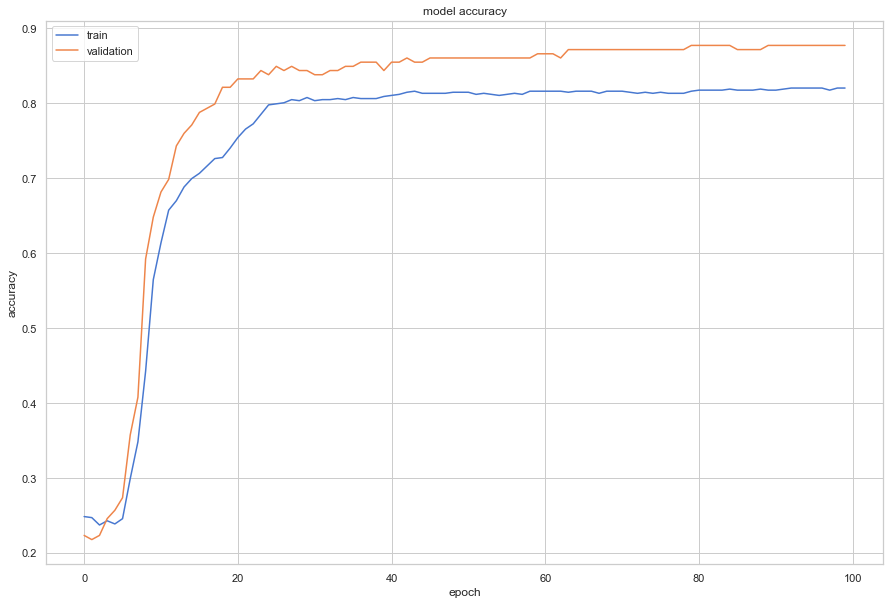

In [93]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [94]:
test['Survived'] = model.predict(X_test)
test['Survived'] = test['Survived'].apply(lambda x: round(x,0)).astype('int')
solution = test[['PassengerId', 'Survived']]

In [95]:
test['Survived'].value_counts()

0    250
1    168
Name: Survived, dtype: int64